In [ ]:
!rm -r WalkRNN

In [1]:
!git clone https://github.com/dtylor/WalkRNN.git

fatal: destination path 'WalkRNN' already exists and is not an empty directory.


In [2]:
%cd WalkRNN
!ls

/notebooks/WalkRNN
Demonstration.ipynb    Motivation.ipynb  __init__.py  module.py
LICENSE-3RD-PARTY.txt  OrgChart.ipynb	 __pycache__  n2v
LICENSE.md	       README.md	 examples     test.py
MUTAG.ipynb	       TODO		 graphwave    utilities.py


In [3]:
!conda install fastai  -c fastai -c pytorch --yes


Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [4]:
import fastai
import pandas as pd

In [5]:
from fastai.utils.show_install import *
show_install()



```text
=== Software === 
python        : 3.6.7
fastai        : 1.0.58
fastprogress  : 0.1.21
torch         : 1.0.0
nvidia driver : 418.67
torch cuda    : 9.0.176 / is available
torch cudnn   : 7401 / is enabled

=== Hardware === 
nvidia gpus   : 1
torch devices : 1
  - gpu0      : 8126MB | Quadro M4000

=== Environment === 
platform      : Linux-4.4.0-130-generic-x86_64-with-debian-stretch-sid
distro        : #156-Ubuntu SMP Thu Jun 14 08:53:28 UTC 2018
conda env     : fastai
python        : /opt/conda/envs/fastai/bin/python
sys.path      : /opt/conda/envs/fastai/lib/python36.zip
/opt/conda/envs/fastai/lib/python3.6
/opt/conda/envs/fastai/lib/python3.6/lib-dynload

/opt/conda/envs/fastai/lib/python3.6/site-packages
/opt/conda/envs/fastai/lib/python3.6/site-packages/IPython/extensions
/root/.ipython
```

Please make sure to include opening/closing ``` when you paste into forums/github to make the reports appear formatted as code sections.

Optional package(s) to enhance the diagnosti

In [6]:
!pip install -U scikit-learn

Requirement already up-to-date: scikit-learn in /opt/conda/envs/fastai/lib/python3.6/site-packages (0.21.3)


In [7]:
!pip install networkx

In [8]:
!pip install seaborn

In [9]:
from utilities import load_graph_kernel_graph, load_graph_kernel_labels, transform_graph


Gkern = load_graph_kernel_graph("./examples/data/DD")
y = load_graph_kernel_labels("./examples/data/DD")


DONE


In [10]:
import random, networkx as nx
components = set(nx.get_node_attributes(Gkern,'component').values())
comp_sm = random.sample(list(components),200)
nodes_small =[x for comp in comp_sm for x,y in Gkern.nodes(data=True) if y['component']==comp] 
print(len(nodes_small))
Gsm = Gkern.subgraph(nodes_small)

54452


In [11]:
#Transform networkx property graph into a format prepared for WalkRNN
G, current_vocab_size = transform_graph(Gsm, params={'num_kmeans_clusters': 4, "num_pca_components": 5, "num_batch":50, 'num_att_kmeans_clusters': 10})

finished graphwave_alg batches


In [12]:
import matplotlib.pyplot as plt
import networkx as nx
# create number for each group to allow use of colormap
from itertools import count


def plotGW(tmpG, comp_no):
 # get unique groups
 groups = set(nx.get_node_attributes(tmpG,'structure').values())

 mapping = dict(zip(sorted(groups),count()))
  
 comp_nodes = [x for x,y in tmpG.nodes(data=True) if y['component']==comp_no]
 print(len(comp_nodes))
 subgraph = tmpG.subgraph(comp_nodes)
 nodes = subgraph.nodes()
 colors = [mapping[subgraph.node[n]['structure']] for n in nodes]

 # drawing nodes and edges separately so we can capture collection for colobar
 pos = nx.spring_layout(subgraph)
 ec = nx.draw_networkx_edges(subgraph, pos, with_labels=True,alpha=0.2)
 nc = nx.draw_networkx_nodes(subgraph, pos, nodelist=nodes, node_color=colors, 
                            with_labels=True, node_size=100, cmap=plt.cm.jet, vmin=0,vmax=5)
 plt.colorbar(nc)
 plt.axis('off')
 plt.show()
 print(nx.get_node_attributes(subgraph,'structure'))
 

353


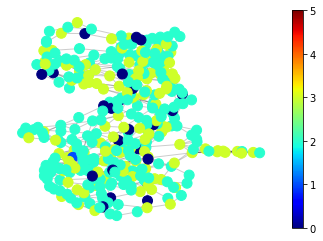

{297520: 41, 297521: 41, 297522: 38, 297523: 40, 297524: 40, 297525: 38, 297526: 40, 297527: 40, 297528: 40, 297529: 40, 297530: 38, 297531: 40, 297532: 41, 297533: 41, 297534: 41, 297535: 41, 297536: 41, 297537: 41, 297538: 41, 297539: 40, 297540: 39, 297541: 41, 297542: 40, 297543: 41, 297544: 41, 297545: 40, 297546: 41, 297547: 40, 297548: 40, 297549: 41, 297550: 40, 297551: 40, 297552: 38, 297553: 41, 297554: 41, 297555: 40, 297556: 40, 297557: 40, 297558: 41, 297559: 40, 297560: 40, 297561: 41, 297562: 40, 297563: 41, 297564: 41, 297565: 41, 297566: 41, 297567: 40, 297568: 40, 297569: 41, 297570: 41, 297571: 40, 297572: 40, 297573: 41, 297574: 41, 297575: 41, 297576: 40, 297577: 38, 297578: 38, 297579: 41, 297580: 40, 297581: 41, 297582: 41, 297583: 40, 297584: 40, 297585: 40, 297586: 40, 297587: 41, 297588: 40, 297589: 40, 297590: 40, 297591: 40, 297592: 41, 297593: 40, 297594: 41, 297595: 41, 297596: 41, 297597: 40, 297598: 40, 297599: 40, 297600: 41, 297601: 41, 297602: 40, 297

In [13]:
plotGW(G,comp_sm[1])

59


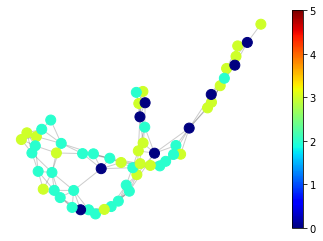

{308992: 38, 308993: 40, 308994: 40, 308995: 40, 308996: 40, 308997: 40, 308998: 40, 308999: 41, 309000: 40, 309001: 40, 309002: 38, 309003: 40, 309004: 40, 309005: 40, 309006: 38, 309007: 41, 309008: 41, 309009: 41, 309010: 41, 309011: 41, 309012: 40, 309013: 41, 309014: 40, 309015: 40, 309016: 40, 309017: 40, 309018: 40, 309019: 41, 309020: 40, 309021: 40, 309022: 40, 309023: 40, 309024: 40, 309025: 41, 309026: 41, 309027: 38, 309028: 41, 309029: 41, 308971: 41, 308972: 40, 308973: 40, 308974: 40, 308975: 40, 308976: 41, 308977: 41, 308978: 41, 308979: 41, 308980: 41, 308981: 38, 308982: 38, 308983: 40, 308984: 41, 308985: 41, 308986: 40, 308987: 41, 308988: 38, 308989: 38, 308990: 41, 308991: 38}


In [14]:
plotGW(G,comp_sm[2])

201


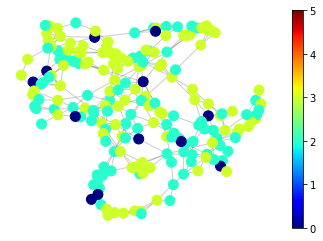

{311578: 40, 311579: 40, 311580: 40, 311581: 40, 311582: 40, 311583: 40, 311584: 40, 311585: 40, 311586: 40, 311587: 40, 311588: 38, 311589: 40, 311590: 40, 311591: 38, 311592: 40, 311593: 41, 311594: 38, 311595: 40, 311596: 40, 311597: 38, 311598: 40, 311599: 40, 311600: 40, 311601: 40, 311602: 40, 311603: 40, 311604: 40, 311605: 40, 311606: 40, 311607: 40, 311608: 40, 311609: 40, 311610: 40, 311611: 41, 311612: 40, 311613: 41, 311614: 40, 311615: 41, 311616: 40, 311617: 40, 311618: 40, 311619: 40, 311620: 40, 311621: 40, 311622: 38, 311623: 40, 311624: 40, 311625: 40, 311626: 40, 311627: 38, 311628: 40, 311629: 38, 311630: 40, 311631: 41, 311632: 40, 311633: 40, 311634: 40, 311635: 40, 311636: 38, 311637: 40, 311638: 38, 311639: 41, 311640: 40, 311641: 40, 311642: 41, 311643: 41, 311644: 41, 311645: 40, 311646: 41, 311647: 41, 311648: 41, 311649: 38, 311650: 41, 311651: 41, 311652: 40, 311653: 41, 311654: 41, 311655: 41, 311656: 40, 311657: 40, 311658: 40, 311659: 40, 311660: 40, 311

In [15]:
plotGW(G,comp_sm[3])

347


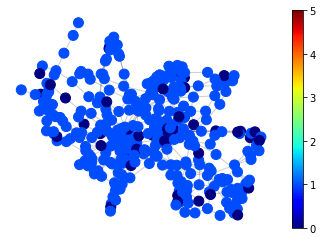

{47117: 39, 47118: 39, 47119: 39, 47120: 38, 47121: 39, 47122: 39, 47123: 39, 47124: 39, 47125: 39, 47126: 39, 47127: 38, 47128: 39, 47129: 39, 47130: 39, 47131: 39, 47132: 39, 47133: 38, 47134: 39, 47135: 39, 47136: 39, 47137: 38, 47138: 39, 47139: 38, 47140: 39, 47141: 39, 47142: 38, 47143: 39, 47144: 39, 47145: 39, 47146: 39, 47147: 39, 47148: 39, 47149: 39, 47150: 39, 47151: 39, 47152: 39, 47153: 38, 47154: 39, 47155: 39, 47156: 39, 47157: 39, 47158: 39, 47159: 39, 47160: 38, 47161: 39, 47162: 39, 47163: 38, 47164: 39, 47165: 38, 47166: 38, 47167: 38, 47168: 39, 47169: 38, 47170: 39, 47171: 38, 47172: 39, 47173: 39, 47174: 38, 47175: 39, 47176: 39, 47177: 39, 47178: 39, 47179: 39, 47180: 39, 47181: 39, 47182: 39, 47183: 39, 47184: 39, 47185: 39, 47186: 39, 47187: 39, 47188: 39, 47189: 39, 47190: 39, 47191: 39, 47192: 39, 47193: 39, 47194: 39, 47195: 39, 47196: 39, 47197: 39, 47198: 39, 47199: 39, 47200: 38, 47201: 39, 47202: 39, 47203: 39, 47204: 39, 47205: 39, 47206: 39, 47207: 39

In [16]:
plotGW(G,comp_sm[101])

534


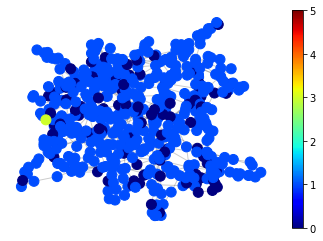

{21338: 39, 21339: 39, 21340: 39, 21341: 39, 21342: 39, 21343: 39, 21344: 39, 21345: 39, 21346: 39, 21347: 39, 21348: 39, 21349: 39, 21350: 39, 21351: 39, 21352: 39, 21353: 39, 21354: 39, 21355: 39, 21356: 39, 21357: 39, 21358: 39, 21359: 39, 21360: 39, 21361: 39, 21362: 38, 21363: 39, 21364: 39, 21365: 39, 21366: 39, 21367: 39, 21368: 39, 21369: 39, 21370: 39, 21371: 39, 21372: 39, 21373: 39, 21374: 39, 21375: 38, 21376: 39, 21377: 39, 21378: 39, 21379: 39, 21380: 39, 21381: 39, 21382: 39, 21383: 39, 21384: 39, 21385: 39, 21386: 39, 21387: 38, 21388: 39, 21389: 39, 21390: 38, 21391: 38, 21392: 39, 21393: 39, 21394: 38, 21395: 39, 21396: 39, 21397: 39, 21398: 39, 21399: 38, 21400: 39, 21401: 39, 21402: 38, 21403: 38, 21404: 39, 21405: 39, 21406: 39, 21407: 38, 21408: 39, 21409: 39, 21410: 39, 21411: 38, 21412: 38, 21413: 39, 21414: 39, 21415: 39, 21416: 38, 21417: 38, 21418: 39, 21419: 38, 21420: 39, 21421: 38, 21422: 39, 21423: 39, 21424: 38, 21425: 39, 21426: 38, 21427: 39, 21428: 38

In [17]:
plotGW(G,comp_sm[51])

In [18]:
from module import walk_as_string
walks = walk_as_string(G, componentLabels = y,params={'num_walks': 20, 'walk_length': 40})

Walk iteration:
('1', '/', '20')
('2', '/', '20')
('3', '/', '20')
('4', '/', '20')
('5', '/', '20')
('6', '/', '20')
('7', '/', '20')
('8', '/', '20')
('9', '/', '20')
('10', '/', '20')
('11', '/', '20')
('12', '/', '20')
('13', '/', '20')
('14', '/', '20')
('15', '/', '20')
('16', '/', '20')
('17', '/', '20')
('18', '/', '20')
('19', '/', '20')
('20', '/', '20')


/notebooks/WalkRNN/module.py:140: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  sorted_walks = pd.DataFrame(walks).sort_values(0).as_matrix()


[328 500 421 422 421 499 542 416 417 418 499 418 499 418 643 499 420 499 541 540 628 543 540 510 543 628 543 540 628
 542 499 421 331 328 329 332 329 331 500 331]
[328 421 422 417 424 423 445 444 445 423 422 487 354 487 422 417 420 354 562 563 576 533 532 533 575 539 535 536 539
 533 535 533 535 534 535 539 563 556 562 561]
[328 418 643 599 605 606 548 546 475 476 548 648 548 547 546 475 476 384 490 488 491 488 489 488 489 488 491 384 383
 386 385 386 385 384 385 384 491 384 385 384]


In [19]:
from fastai.text import *
from sklearn.model_selection import train_test_split
import numpy


In [20]:
walks.head()

,walk,label,start_node,component
0,18 38 15 38 0 38 0 39 0 38 9 38 10 39 3...,1,328,2
1,18 38 0 38 0 39 7 39 15 39 9 39 10 39 7...,1,328,2
2,18 38 19 39 6 39 10 39 11 39 14 39 10 39...,1,328,2
3,18 38 15 38 7 39 10 39 10 39 7 39 10 39 ...,1,328,2
4,18 38 0 38 18 38 10 39 18 38 0 38 18 38 ...,1,328,2


In [21]:
walks.shape

(1089040, 4)

In [22]:
from sklearn.model_selection import train_test_split
import numpy
data = list(set(walks.component))
x_traina ,x_test = train_test_split(data,test_size=0.1)    
x_train ,x_val = train_test_split(x_traina,test_size=0.2)  


In [23]:
train_tmp = pd.DataFrame(x_train)
train_tmp.columns = ['component']
df_train = pd.merge(walks, train_tmp, on='component', sort=False)
df_train.shape

(787280, 4)

In [24]:
test_tmp = pd.DataFrame(x_test)
test_tmp.columns = ['component']
df_test = pd.merge(walks, test_tmp, on='component', sort=False)
df_test.shape

(101320, 4)

In [25]:
val_tmp = pd.DataFrame(x_val)
val_tmp.columns = ['component']
df_val = pd.merge(walks, val_tmp, on='component', sort=False)
df_val.shape

(200440, 4)

In [26]:
!mkdir result
mypath = './result'

In [27]:
data_lm = TextLMDataBunch.from_df(train_df=df_train[['walk', 'label']], valid_df=df_val[[
                                  'walk', 'label']],  path=mypath, text_cols='walk', label_cols='label')


In [28]:
data_lm.save('data_lm1.pkl')

In [29]:
!ls -l ./result

total 901720
-rw-r--r-- 1 root root 923358841 Oct  2 17:23 data_lm1.pkl


In [30]:
bs = 32
# load the data (can be used in the future as well to prevent reprocessing)
data_lm = load_data(mypath, 'data_lm1.pkl', bs=bs)

In [31]:
data_lm.show_batch() # take a look at the batch fed into the GPU

idx,text
0,39 7 39 10 39 10 39 15 38 10 39 xxbos 18 38 0 38 0 39 7 39 15 39 9 39 10 39 7 39 10 39 9 39 0 39 13 38 16 38 13 38 0 39 7 39 2 39 16 38 9 39 11 39 9 39 5 39 11 38 5 39 10 39 3 38 9 39 14 39 3 38
1,10 39 7 39 13 39 15 38 10 39 7 39 13 39 10 39 11 38 1 39 2 39 0 39 2 39 0 39 10 39 2 39 18 39 16 39 0 39 16 39 9 39 0 39 9 39 1 39 2 39 16 39 xxbos 7 39 2 39 11 39 7 39 11 39 18 39 11 39 7 39 12
2,38 19 39 7 39 9 39 3 39 15 39 xxbos 7 39 10 38 9 39 19 38 9 39 19 38 3 39 1 38 3 39 11 39 14 39 11 39 10 39 10 39 19 38 10 39 3 39 7 39 11 39 14 39 0 39 10 39 9 39 9 39 5 38 11 39 14 38 19 39 6 39
3,13 39 19 38 1 39 19 38 15 39 0 39 15 39 15 39 15 39 0 39 13 39 19 38 0 39 0 39 15 38 0 39 0 39 0 39 12 39 15 39 7 39 12 39 0 39 10 39 0 39 9 39 xxbos 10 39 10 39 9 39 9 39 10 39 10 39 19 39 18 39 19
4,39 14 39 10 39 4 39 13 39 14 39 xxbos 15 39 13 39 9 38 2 39 16 39 0 38 13 38 13 38 0 38 13 38 10 39 13 38 16 39 0 38 16 39 14 39 9 38 1 39 7 39 1 39 8 39 7 39 0 38 4 39 7 39 7 39 19 38 15 39 18 39


In [32]:
awd_lstm_lm_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.1, hidden_p=0.15, input_p=0.25, embed_p=0.02, weight_p=0.2, tie_weights=True, out_bias=True)
awd_lstm_clas_config = dict(emb_sz=400, n_hid=600, n_layers=1, pad_token=1, qrnn=False, bidir=False, output_p=0.4,  hidden_p=0.3, input_p=0.4, embed_p=0.05, weight_p=0.5)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,accuracy,time
0,1.654917,1.601938,0.489542,14:08


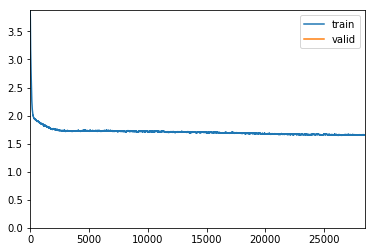

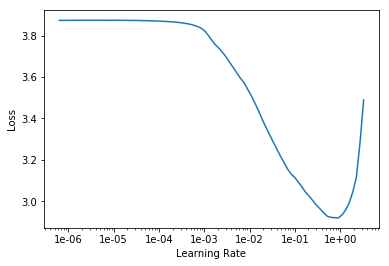

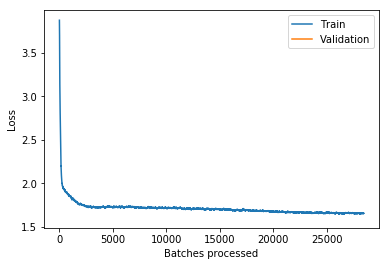

In [33]:
#learn = language_model_learner(data_lm, emb_sz=400, drop_mult=1.9, nl=1,nh = 600, callback_fns=ShowGraph)
learn = language_model_learner(data_lm,arch=AWD_LSTM,config= awd_lstm_lm_config,drop_mult=1.9, callback_fns=ShowGraph,pretrained=False)
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))
learn.recorder.plot_losses()
learn.save('fit-head')


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


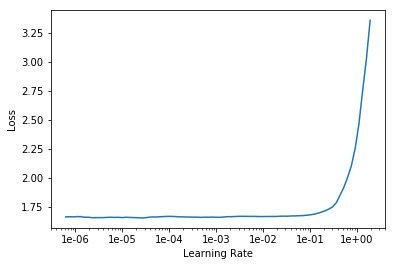

In [34]:
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

epoch,train_loss,valid_loss,accuracy,time
0,1.694761,1.632175,0.481134,14:15
1,1.684396,1.624387,0.486694,14:16


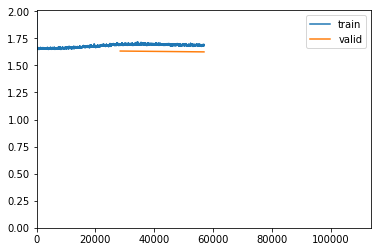

KeyboardInterrupt: 

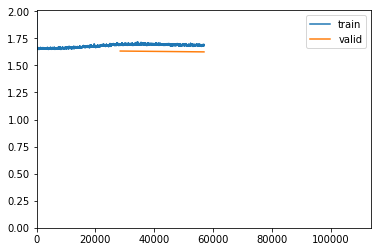

In [35]:
learn.fit_one_cycle(4, .01, moms=(0.8,0.7))

In [45]:
learn.save('fit-head')

In [46]:
learn.save_encoder('fine_tuned_enc3')

In [47]:
df = walks.sample(frac=1).reset_index(drop=True)
df['index1']=df.index

g = df.groupby('component')
df['RN'] = g['index1'].rank(method='min')

df[df['component']==1].head()


,walk,label,start_node,component,index1,RN


In [48]:
df.groupby('component')['walk'].apply(lambda x: ', '.join(x))

def f(x):
     return Series(dict(label = x['label'].min(), text =  ', '.join(x['walk'])))
df_text_comp = df[(df['RN']<=9.0)].groupby('component').apply(f)
df_text_comp.head()

,label,text
component,,
2,1,16 39 19 39 16 39 16 39 19 39 16 39 10 3...
11,1,1 39 16 38 19 39 10 39 19 39 16 38 10 39...
17,1,4 39 10 39 10 38 3 39 4 39 3 39 7 39 3 ...
30,1,15 38 7 39 11 39 7 38 6 39 2 39 7 38 11...
37,1,14 39 15 39 3 38 15 39 10 39 15 39 10 39...


In [49]:
df_text_comp['component']= df_text_comp.index
df_text_comp.index.names = ['comp']
df_text_comp.head()

,label,text,component
comp,,,
2,1,16 39 19 39 16 39 16 39 19 39 16 39 10 3...,2
11,1,1 39 16 38 19 39 10 39 19 39 16 38 10 39...,11
17,1,4 39 10 39 10 38 3 39 4 39 3 39 7 39 3 ...,17
30,1,15 38 7 39 11 39 7 38 6 39 2 39 7 38 11...,30
37,1,14 39 15 39 3 38 15 39 10 39 15 39 10 39...,37


In [50]:
train = pd.merge(df_text_comp, train_tmp, on='component', sort=False)
test =  pd.merge(df_text_comp, test_tmp, on='component', sort=False)
val =  pd.merge(df_text_comp, val_tmp, on='component', sort=False)
(train.shape,val.shape, test.shape, train.shape[0]/df_text_comp.shape[0])

((144, 3), (36, 3), (20, 3), 0.72)

In [51]:
bs=32#48

data_clas = TextClasDataBunch.from_df(train_df=train[['text','label']],valid_df=val[['text','label']],  path=mypath, text_cols='text',label_cols = 'label', vocab=data_lm.vocab)


In [52]:
data_clas.save('tmp_clas1')

In [53]:
data_clas = load_data(mypath, 'tmp_clas1', bs=bs)

In [54]:
data_clas.show_batch()

text,target
xxbos 6 39 9 38 7 38 6 39 9 38 6 39 6 39 13 39 5 38 12 39 11 39 16 39 10 39 16 39 0 39 16 39 0 39 3 39 0 39 3 39 6 39 7 39 1 39 2 39 16 39 14 38 16 39 9 39 14 39 6 39 17 39 9 39 16 39 14 38 7,1
xxbos 5 39 11 39 15 38 16 38 2 38 18 38 3 38 6 38 14 38 5 39 2 39 8 38 3 38 15 38 15 38 17 39 0 39 1 38 0 39 17 39 3 38 18 38 2 38 5 39 11 39 5 38 10 38 5 39 18 38 2 38 2 38 16 38 2 38 18 38 2,1
xxbos 1 41 18 40 2 38 3 38 2 38 6 38 9 40 11 40 11 40 18 40 2 38 2 40 18 40 2 40 15 41 19 40 15 41 15 40 2 40 2 40 18 40 3 38 6 38 19 38 3 40 19 38 18 40 11 40 13 38 8 40 16 40 3 40 19 38 6 38 19,2
xxbos 1 38 9 38 8 41 15 40 4 40 19 38 5 38 8 38 9 38 10 40 8 38 5 38 19 38 15 40 4 40 15 40 5 38 19 38 4 40 15 40 5 38 8 38 10 40 9 38 1 38 10 40 8 41 10 40 8 41 19 38 5 38 15 40 8 41 19 38 10,2
xxbos 3 38 14 39 3 38 2 38 0 38 8 38 14 39 5 38 16 39 8 38 0 38 1 38 8 38 14 39 2 38 3 38 5 38 3 38 5 38 15 39 8 38 1 38 0 38 6 39 0 38 8 38 16 39 5 38 16 39 0 38 8 38 14 39 5 38 14 39 2,1


In [55]:
#learn = text_classifier_learner(data_clas, emb_sz=400, drop_mult=1.9, nl=1,nh = 600)
learn = text_classifier_learner(data_clas,arch=AWD_LSTM,config = awd_lstm_clas_config, drop_mult=2.0,pretrained=False)
learn.load_encoder('fine_tuned_enc3')
learn.freeze()

In [56]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


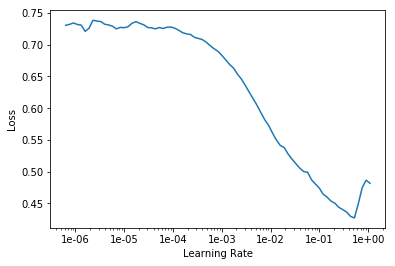

In [57]:
learn.recorder.plot()

In [58]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.452556,0.602855,0.666667,00:02


In [59]:
def predict(test,learn):
  predictions=[]
  for index, row in test.iterrows():
    p=learn.predict(row['text'])
    #print((row['label'],str(p[0])))
    predictions.append((row['text'],str(row['label']),str(p[0])))
  dfpred = pd.DataFrame(predictions)
  dfpred.columns=['text','label','prediction']
  match=dfpred[(dfpred['label']==dfpred['prediction'])]
  #match.head()
  print((dfpred.shape[0], match.shape[0],match.shape[0]/dfpred.shape[0]))

In [60]:
learn.fit_one_cycle(1, 5e-02, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.258980,0.430088,0.944444,00:02


In [61]:
learn.unfreeze()
learn.fit_one_cycle(8, slice(5e-3/(2.6**4),5e-03), moms=(0.8,0.7))


epoch,train_loss,valid_loss,accuracy,time
0,0.274365,0.406596,0.944444,00:03
1,0.261783,0.402246,0.944444,00:03
2,0.256659,0.377461,0.944444,00:03
3,0.222390,0.340119,0.944444,00:03
4,0.217500,0.302469,0.944444,00:03
5,0.221610,0.273771,0.916667,00:03
6,0.221661,0.263034,0.916667,00:03
7,0.222362,0.249925,0.916667,00:03


In [62]:
predict(test,learn)

(20, 18, 0.9)


In [63]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.145963,0.240307,0.916667,00:03
1,0.154006,0.215097,0.916667,00:03
2,0.160041,0.189672,0.916667,00:03
3,0.166756,0.181370,0.916667,00:03
4,0.173861,0.172474,0.944444,00:03
5,0.173161,0.162464,0.916667,00:03
6,0.170920,0.153169,0.916667,00:03
7,0.176355,0.148268,0.944444,00:03
8,0.173936,0.146040,0.944444,00:03
9,0.178697,0.150644,0.944444,00:03


In [64]:
predict(test,learn)

(20, 19, 0.95)


In [65]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.178381,0.152643,0.944444,00:03
1,0.169276,0.148907,0.944444,00:03
2,0.164947,0.145031,0.944444,00:03
3,0.163111,0.144075,0.944444,00:03
4,0.163895,0.138169,0.944444,00:03
5,0.165391,0.136406,0.944444,00:03
6,0.166668,0.143236,0.916667,00:03
7,0.168503,0.139774,0.944444,00:03
8,0.168597,0.138390,0.944444,00:03
9,0.160635,0.137875,0.944444,00:03


In [66]:
predict(test,learn)

(20, 19, 0.95)


In [67]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.140545,0.137546,0.944444,00:03
1,0.128690,0.136054,0.944444,00:03
2,0.133176,0.132037,0.944444,00:03
3,0.143421,0.129972,0.944444,00:03
4,0.144440,0.125078,0.944444,00:03
5,0.146769,0.125737,0.944444,00:03
6,0.146516,0.127214,0.944444,00:03
7,0.142354,0.122844,0.944444,00:03
8,0.161544,0.126256,0.944444,00:03
9,0.158800,0.132158,0.944444,00:03


In [68]:
predict(test,learn)

(20, 19, 0.95)


In [69]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.146228,0.132849,0.944444,00:03
1,0.152115,0.132538,0.944444,00:03
2,0.147303,0.134542,0.944444,00:03
3,0.151868,0.136391,0.944444,00:03
4,0.148573,0.142561,0.944444,00:03
5,0.140270,0.139659,0.944444,00:03
6,0.140893,0.150481,0.944444,00:03
7,0.144799,0.161495,0.944444,00:03
8,0.140631,0.162712,0.944444,00:03
9,0.139772,0.160838,0.944444,00:03


In [70]:
predict(test,learn)

(20, 19, 0.95)


In [71]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.160517,0.152989,0.944444,00:03
1,0.181226,0.153570,0.944444,00:03
2,0.171640,0.153925,0.944444,00:03
3,0.156201,0.150360,0.944444,00:03
4,0.144809,0.160459,0.944444,00:03
5,0.142971,0.149513,0.944444,00:03
6,0.148294,0.163959,0.944444,00:03
7,0.160024,0.156656,0.944444,00:03
8,0.160134,0.152804,0.944444,00:03
9,0.160091,0.154794,0.944444,00:03


In [72]:
predict(test,learn)

(20, 19, 0.95)


In [73]:
learn.fit_one_cycle(16, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.159627,0.152604,0.944444,00:03
1,0.154220,0.154874,0.944444,00:03
2,0.161210,0.154931,0.944444,00:03
3,0.155993,0.146962,0.944444,00:03
4,0.146986,0.160278,0.944444,00:03
5,0.143360,0.154011,0.944444,00:03
6,0.143556,0.156010,0.944444,00:03
7,0.151564,0.149320,0.944444,00:03
8,0.153183,0.143271,0.944444,00:03
9,0.149164,0.141453,0.944444,00:03


In [74]:
predict(test,learn)

(20, 19, 0.95)


In [75]:
learn.model

SequentialRNN(
  (0): MultiBatchEncoder(
    (module): AWD_LSTM(
      (encoder): Embedding(48, 400, padding_idx=1)
      (encoder_dp): EmbeddingDropout(
        (emb): Embedding(48, 400, padding_idx=1)
      )
      (rnns): ModuleList(
        (0): WeightDropout(
          (module): LSTM(400, 400, batch_first=True)
        )
      )
      (input_dp): RNNDropout()
      (hidden_dps): ModuleList(
        (0): RNNDropout()
      )
    )
  )
  (1): PoolingLinearClassifier(
    (layers): Sequential(
      (0): BatchNorm1d(1200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (1): Dropout(p=0.8)
      (2): Linear(in_features=1200, out_features=50, bias=True)
      (3): ReLU(inplace)
      (4): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): Dropout(p=0.1)
      (6): Linear(in_features=50, out_features=2, bias=True)
    )
  )
)